In [75]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [76]:
penguim = sns.load_dataset('penguins')
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


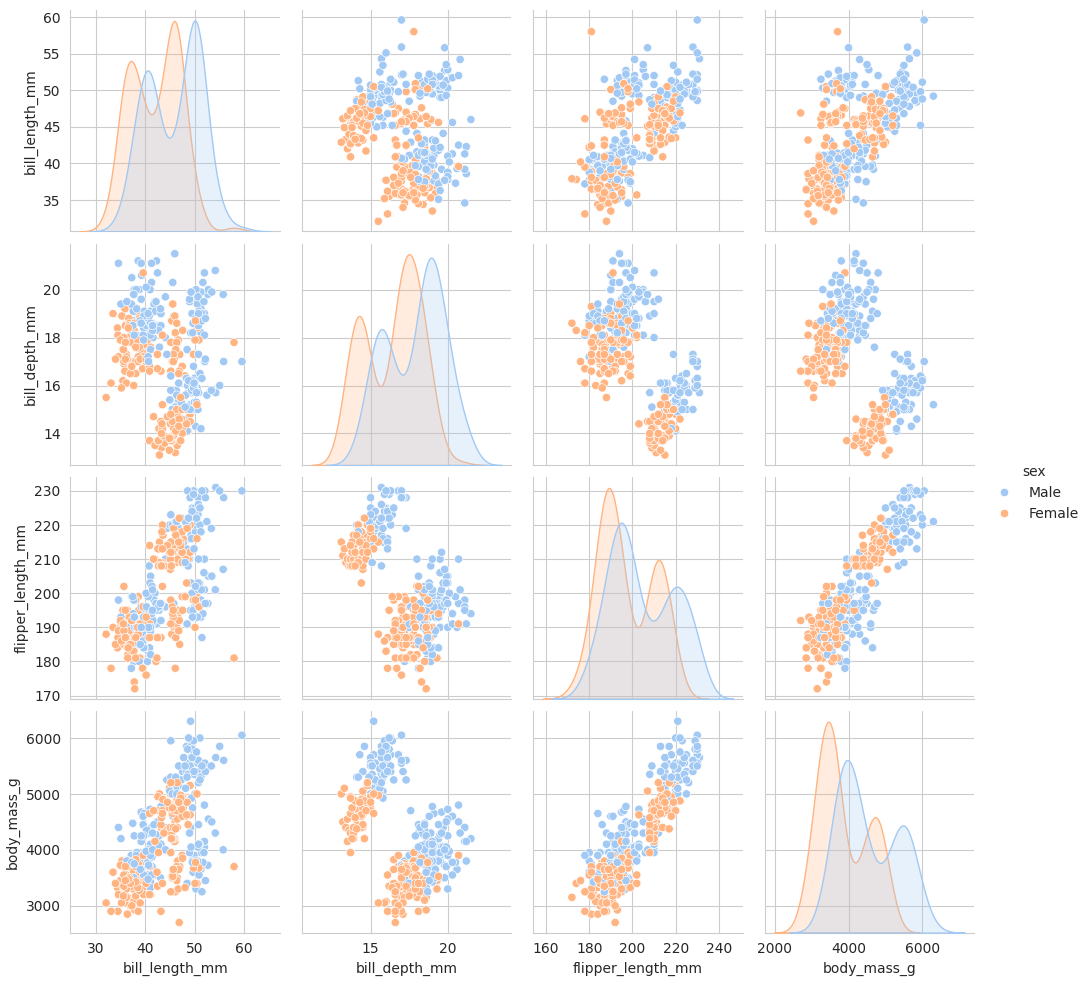

In [77]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

# os machos sao mais pesados do que as femias / quanto maior o bill e o flipeer mais pessado eles serao  

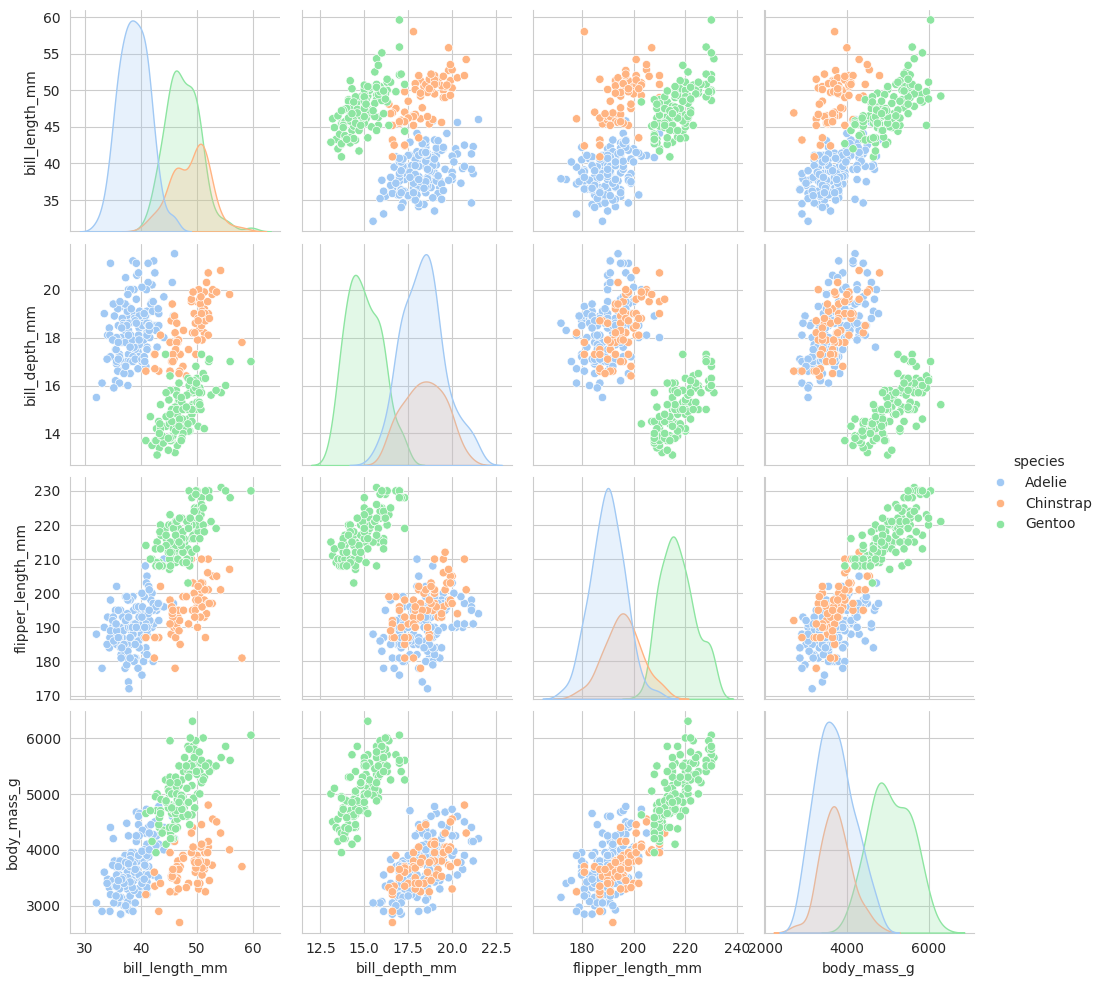

In [78]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

# que a gentoo e a especie mais pesada do mundo sendo as outras duas bem iguais em relacao ao peso 

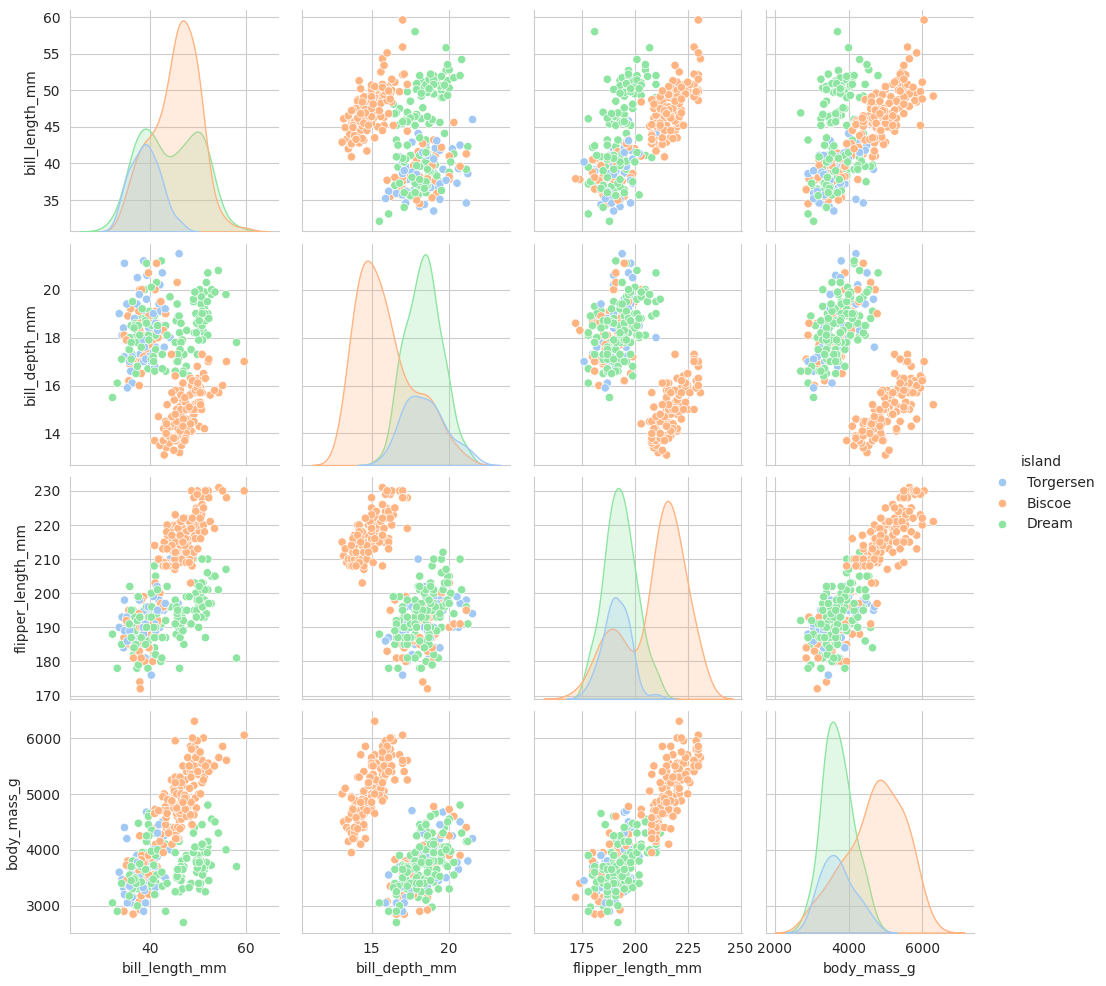

In [79]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

# que na ilha biscoe os piguins sao mais pessados e nas outras e bem distribuido o peso 

In [80]:
penguim.dropna(inplace = True)

In [81]:
media_bill_length_mm = penguim['bill_length_mm'].mean()
devio_bill_length_mm = penguim['bill_length_mm'].std()

penguim['bill_length_mm_std'] = penguim['bill_length_mm'].apply(lambda x : (x - media_bill_length_mm) / devio_bill_length_mm)

In [82]:
media_bill_depth_mm = penguim['bill_depth_mm'].mean()
desvio_bill_depth_mm = penguim['bill_depth_mm'].std()

penguim['bill_depth_mm_std'] = penguim['bill_depth_mm'].apply(lambda x : (x - media_bill_depth_mm) / desvio_bill_depth_mm)

In [83]:
media_flipper_length_mm = penguim['flipper_length_mm'].mean()
devio_flipper_length_mm = penguim['flipper_length_mm'].std()

penguim['flipper_length_mm_std'] = penguim['flipper_length_mm'].apply(lambda x : (x - media_flipper_length_mm) / devio_flipper_length_mm)

In [84]:
penguim['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [85]:
penguim['species_adelie_nom'] = penguim['species'].apply(lambda x : 1 if x == 'Adelie' else 0)

penguim['species_gentoo_nom'] = penguim['species'].apply(lambda x : 1 if x == 'Gentoo' else 0)

penguim ['species_Chinstrap_nom'] = penguim['species'].apply(lambda x : 1 if x == 'Chinstrap' else 0)

In [86]:
penguim['island_Torgersen_nom'] = penguim['island'].apply(lambda x : 1 if x == 'Torgersen' else 0)

penguim['island_Biscoe_nom'] = penguim['island'].apply(lambda x : 1 if x == 'Biscoe' else 0)

penguim['island_Dream_nom'] = penguim['island'].apply(lambda x : 1 if x == 'Dream' else 0)

In [87]:
penguim['sex_male_nom'] = penguim['sex'].apply(lambda x : 1 if x == 'Male' else 0)

penguim['sex_female_nom'] = penguim['sex'].apply(lambda x : 1 if x == 'Female' else 0)

In [88]:
penguim

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_adelie_nom,species_gentoo_nom,species_Chinstrap_nom,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,sex_male_nom,sex_female_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608,1,0,0,1,0,0,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867,1,0,0,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733,1,0,0,1,0,0,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429,1,0,0,1,0,0,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0.586470,-1.759497,0.929884,0,1,0,0,1,0,0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0.513326,-1.454811,1.001232,0,1,0,0,1,0,0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1.171621,-0.743875,1.500670,0,1,0,0,1,0,1,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0.220750,-1.200905,0.787187,0,1,0,0,1,0,0,1


In [89]:
penguim.drop(columns={'species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','sex'},inplace= True)

In [90]:
model = LinearRegression()

In [91]:
from sklearn.model_selection import train_test_split
predictors_train,predictors_test, target_train, target_test = train_test_split(
        penguim.drop(['body_mass_g'], axis = 1),
        penguim['body_mass_g'],
        test_size = 0.25,
        random_state = 123
)

In [92]:
model = model.fit(predictors_train,target_train)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'species_adelie_nom', 'species_gentoo_nom',
        'species_Chinstrap_nom', 'island_Torgersen_nom',
        'island_Biscoe_nom', 'island_Dream_nom', 'sex_male_nom',
        'sex_female_nom'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 128.95017535,  159.25487577,  248.88232459, -203.01893742,
         745.76607395, -542.74713653,  -67.62760481,   20.19006002,
          47.43754479,  167.56297759, -167.56297759]),
 'rank_': 8,
 'singular_': array([2.53146876e+01, 1.62653260e+01, 1.16263240e+01, 6.26699417e+00,
        6.14514791e+00, 5.47018227e+00, 3.38493683e+00, 2.23187841e+00,
        2.16015644e-15, 1.37887428e-15, 1.27063475e-15]),
 'intercept_': np.float64(4110.766411860845)}

In [93]:
a = model.coef_

b = model.intercept_

target_preditec = model.predict(predictors_test)

In [94]:
rmse = np.sqrt(mean_squared_error(target_test, target_preditec))

In [95]:
rmse_percentual = (rmse / target_test.mean()) * 100

In [96]:
penguim

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,species_adelie_nom,species_gentoo_nom,species_Chinstrap_nom,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,sex_male_nom,sex_female_nom
0,3750.0,-0.894695,0.779559,-1.424608,1,0,0,1,0,0,1,0
1,3800.0,-0.821552,0.119404,-1.067867,1,0,0,1,0,0,0,1
2,3250.0,-0.675264,0.424091,-0.425733,1,0,0,1,0,0,0,1
4,3450.0,-1.333559,1.084246,-0.568429,1,0,0,1,0,0,0,1
5,3650.0,-0.858123,1.744400,-0.782474,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
338,4925.0,0.586470,-1.759497,0.929884,0,1,0,0,1,0,0,1
340,4850.0,0.513326,-1.454811,1.001232,0,1,0,0,1,0,0,1
341,5750.0,1.171621,-0.743875,1.500670,0,1,0,0,1,0,1,0
342,5200.0,0.220750,-1.200905,0.787187,0,1,0,0,1,0,0,1


In [97]:
bill_length_mm_paronizado = (38.2 - media_bill_length_mm) / devio_bill_length_mm
bill_depth_mm_paronizado = (18.1 - media_bill_depth_mm) / desvio_bill_depth_mm
flipper_length_mm_padronizado = (185.0 - media_flipper_length_mm)/ devio_flipper_length_mm




In [98]:
penguim_peso = np.array([bill_length_mm_paronizado, bill_depth_mm_paronizado, flipper_length_mm_padronizado,1,0,0,0,1,0,1,0])



In [99]:
peso = model.predict(penguim_peso.reshape([1,-1]))
print(peso)

[3751.0028301]


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
